#  Melonama Detection Using CNN Based Model

**Problem Statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Importing important libraries <a name='no1' />

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
## mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This dataset has about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
train_path="gdrive/My Drive/CNN Assignment/Train/"
test_path="gdrive/My Drive/CNN Assignment/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Data Preparation <a name='no2' />

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

### Train Data Set Creation <a name='no2.1' />

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


### Validation Data Set Creation <a name='no2.2' />

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualizing dataset <a name='no3' />

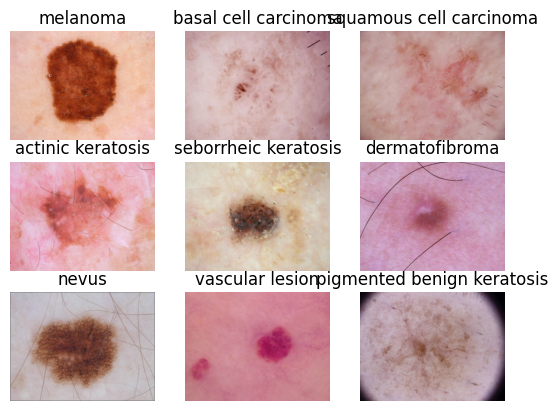

In [ ]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model 0 <a name='no4' />

### Creating the model <a name='no4.1' />

In [ ]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])


### Compiling the model <a name='no4.2' />

In [ ]:
### Todo, choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###  Training the model <a name='no4.3' />

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 189s 677ms/step - loss: 2.8724 - accuracy: 0.2321 - val_loss: 1.9760 - val_accuracy: 0.2864
Epoch 2/20
56/56 [==============================] - 3s 59ms/step - loss: 1.8723 - accuracy: 0.3147 - val_loss: 1.8574 - val_accuracy: 0.4609
Epoch 3/20
56/56 [==============================] - 3s 59ms/step - loss: 1.6511 - accuracy: 0.4096 - val_loss: 1.7448 - val_accuracy: 0.4295
Epoch 4/20
56/56 [==============================] - 3s 55ms/step - loss: 1.5444 - accuracy: 0.4710 - val_loss: 1.5232 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 3s 58ms/step - loss: 1.4652 - accuracy: 0.5100 - val_loss: 1.5022 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 3s 57ms/step - loss: 1.4350 - accuracy: 0.4944 - val_loss: 1.4106 - val_accuracy: 0.5436
Epoch 7/20
56/56 [==============================] - 3s 56ms/step - loss: 1.3740 - accuracy: 0.5402 - val_loss: 1.5333 - val_accuracy: 0.4810
Epoch 8/20

In [ ]:
# Viewing the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

###  Visualizing training results <a name='no4.4' />

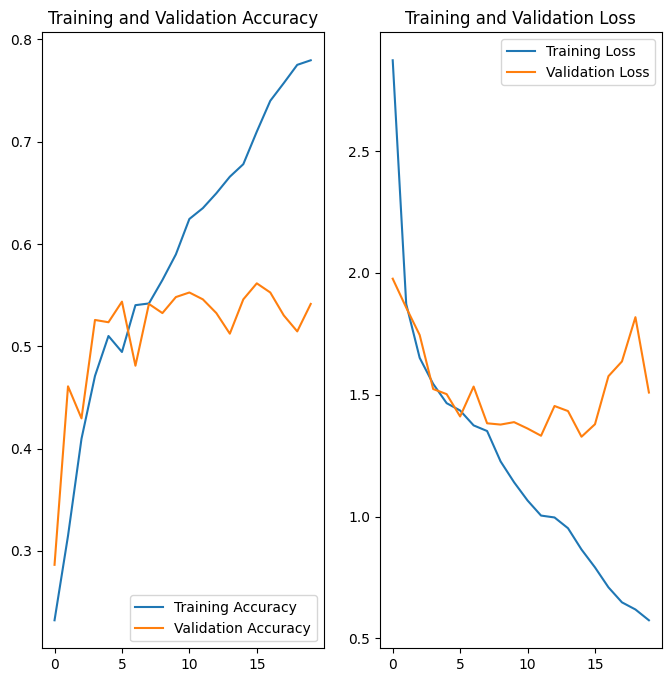

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###  Observations <a name='no4.5' />

-  The accuracy of the model for the **Training data set** is at **78%**. But the **Validation accuracy** is not in par with the training accuracy.
-  It is only at **53%**. The validation loss as observed is very high.
-  This could also be indicative of some **Overfit** in the model.
-  We could add some `Dropout` layers and remove the `BatchNormalization` layers.
-  And by adding a few more layers, we could improve the accuracy by trying to extract more features.

##  Model 1 <a name='no5' />

###  Creating the Model <a name='no5.1' />

In [ ]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### Compiling the model <a name='no5.2' />

In [ ]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

###  Training the model <a name='no5.3' />

In [ ]:
## training our model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 13s 126ms/step - loss: 2.1790 - accuracy: 0.1975 - val_loss: 2.0656 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 6s 109ms/step - loss: 2.0374 - accuracy: 0.1998 - val_loss: 2.0487 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 6s 108ms/step - loss: 2.0464 - accuracy: 0.1814 - val_loss: 2.0286 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 6s 109ms/step - loss: 2.0356 - accuracy: 0.1998 - val_loss: 2.0250 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 6s 110ms/step - loss: 2.0254 - accuracy: 0.2104 - val_loss: 2.0237 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 6s 111ms/step - loss: 2.0224 - accuracy: 0.1931 - val_loss: 2.0105 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 6s 111ms/step - loss: 1.9718 - accuracy: 0.2316 - val_loss: 1.9802 - val_accuracy: 0.2327
Epoch

###   Visualizing the results <a name='no5.4' />

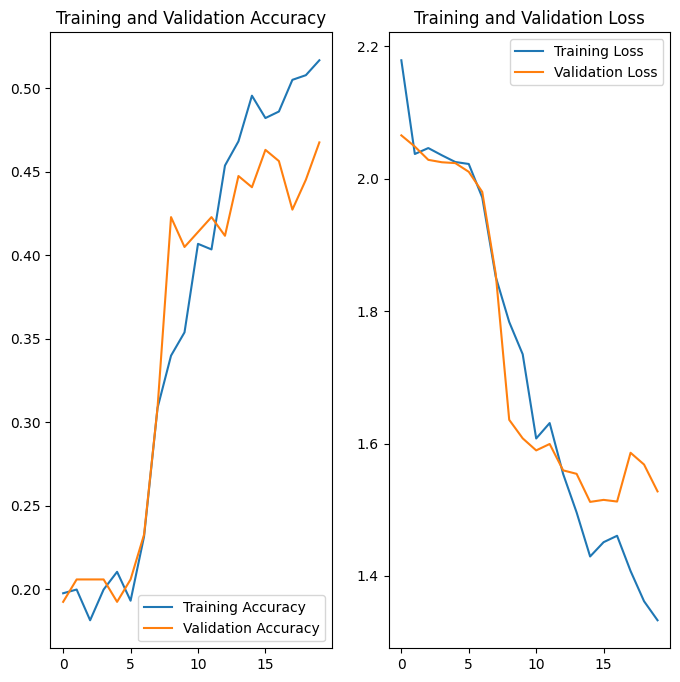

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###  5.5 Observations <a name='no5.5' />

-  The model accuracy for **Train data set** has dropped to nearly **45%**.
-  The accuracy for the **Validation set** is at **40%**.
-  This is a much better model compared to the previous model as there seems to be **No Overfit** with the training accuracy **45%** and validation accuracy at **40%**.

##  Data Augmentation <a name='no6' />

###  Specifying the Augmentation <a name='no6.1' />

In [ ]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

###   Visualizing the Augmented Data <a name='no6.2' />

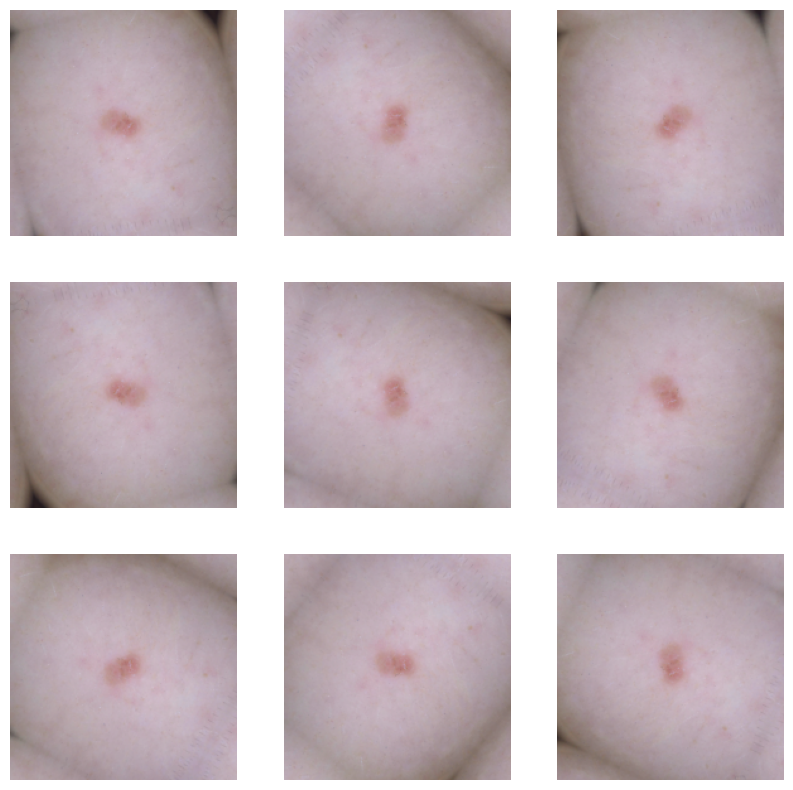

In [ ]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)
  plt.imshow((augmented_image1))
  plt.axis("off")

## Model 2 <a name='no7' />

###   Creating the Model <a name='no7.1' />

In [ ]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

###  Compiling the model <a name='no7.2' />

In [ ]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model <a name='no7.3' />

In [ ]:
## training our model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 134ms/step - loss: 2.1856 - accuracy: 0.1970 - val_loss: 2.0634 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 6s 112ms/step - loss: 2.0389 - accuracy: 0.1886 - val_loss: 2.0214 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 6s 110ms/step - loss: 2.0313 - accuracy: 0.2009 - val_loss: 2.0320 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 6s 110ms/step - loss: 2.0312 - accuracy: 0.1981 - val_loss: 2.0501 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 6s 113ms/step - loss: 2.0271 - accuracy: 0.1953 - val_loss: 2.0294 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 6s 110ms/step - loss: 2.0244 - accuracy: 0.2065 - val_loss: 2.0316 - val_accuracy: 0.1924
Epoch 7/20
56/56 [==============================] - 7s 117ms/step - loss: 2.0313 - accuracy: 0.1864 - val_loss: 2.0233 - val_accuracy: 0.2058
Epoch

### Visualizing the results <a name='no7.4' />

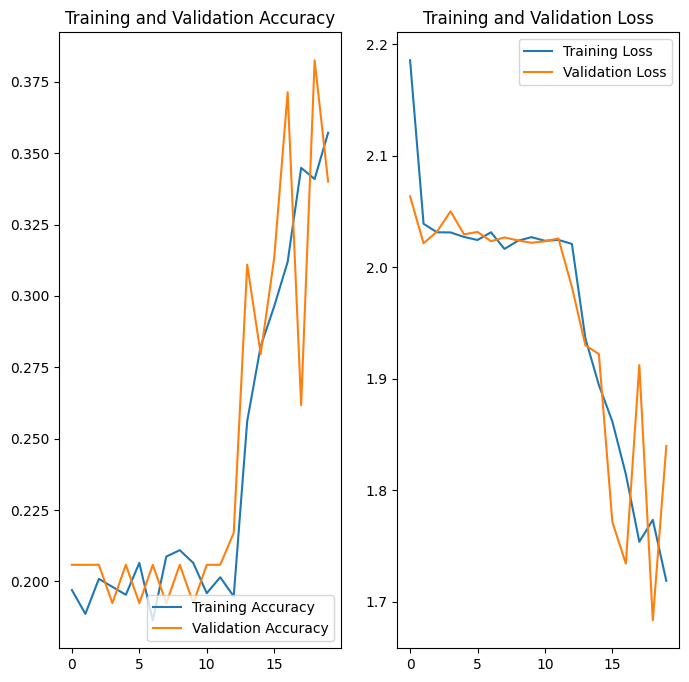

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations <a name='no7.5' />

-  The model accuracy for **Train data set** has gone up to nearly **48%**.
-  The accuracy for the **Validation set** is also at **48%**.
-  This is a much better model compared to the previous two models as there seems to be **No Overfit** with the training accuracy **48%** and validation accuracy at **48%**.
-  `Data Augmentation` has improved the model performance.

## Checking for Class Imbalance <a name='no8' />

In [ ]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


## Using Augmentor for Class Imbalance Treatment <a name='no9' />

###  Installing Augmentor <a name='no9.1' />

In [ ]:
!pip install Augmentor

### Using Augmentor <a name='no9.2' />

In [ ]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F02C7F6BC70>: 100%|██████████| 500/500 [00:29<00:00, 16.76 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02C4E4EDA0>: 100%|██████████| 500/500 [00:29<00:00, 16.70 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02C4EA0550>: 100%|██████████| 500/500 [00:24<00:00, 20.01 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F02C4DFFD90>: 100%|██████████| 500/500 [01:44<00:00,  4.79 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F02C4E121A0>: 100%|██████████| 500/500 [01:46<00:00,  4.70 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02C5FCA8C0>: 100%|██████████| 500/500 [00:22<00:00, 21.75 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F02C7FD5C30>: 100%|██████████| 500/500 [00:49<00:00, 10.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F02C7E00220>: 100%|██████████| 500/500 [00:22<00:00, 21.97 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F02C7F2BCD0>: 100%|██████████| 500/500 [00:21<00:00, 23.58 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


-  The Augmentor has **helped decrease the imbalance** in class images and that can be viewed from above.

##   Modelling Augmented Data <a name='no10' />

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

### Creating the Train Data Set <a name='no10.1' />

In [ ]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Creating the Validation Data Set <a name='no10.2' />

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## Model 3 <a name='no11' />

### Creating the Model <a name='no11.1' />

In [ ]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### Compiling the Model <a name='no11.2' />

In [ ]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the Model <a name='no11.3' />

In [ ]:
epochs = 30
## using 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 45s 250ms/step - loss: 2.5258 - accuracy: 0.1903 - val_loss: 1.8254 - val_accuracy: 0.3645
Epoch 2/30
169/169 [==============================] - 38s 216ms/step - loss: 1.6783 - accuracy: 0.3641 - val_loss: 1.5029 - val_accuracy: 0.4209
Epoch 3/30
169/169 [==============================] - 40s 232ms/step - loss: 1.4898 - accuracy: 0.4381 - val_loss: 1.3900 - val_accuracy: 0.4373
Epoch 4/30
169/169 [==============================] - 36s 205ms/step - loss: 1.3440 - accuracy: 0.4954 - val_loss: 1.2556 - val_accuracy: 0.5019
Epoch 5/30
169/169 [==============================] - 37s 215ms/step - loss: 1.2117 - accuracy: 0.5436 - val_loss: 1.2214 - val_accuracy: 0.5308
Epoch 6/30
169/169 [==============================] - 38s 217ms/step - loss: 1.1123 - accuracy: 0.5816 - val_loss: 1.0612 - val_accuracy: 0.5961
Epoch 7/30
169/169 [==============================] - 37s 215ms/step - loss: 1.0085 - accuracy: 0.6313 - val_loss: 1.0094 - val_ac

###   Visualizing the model results <a name='no11.4' />

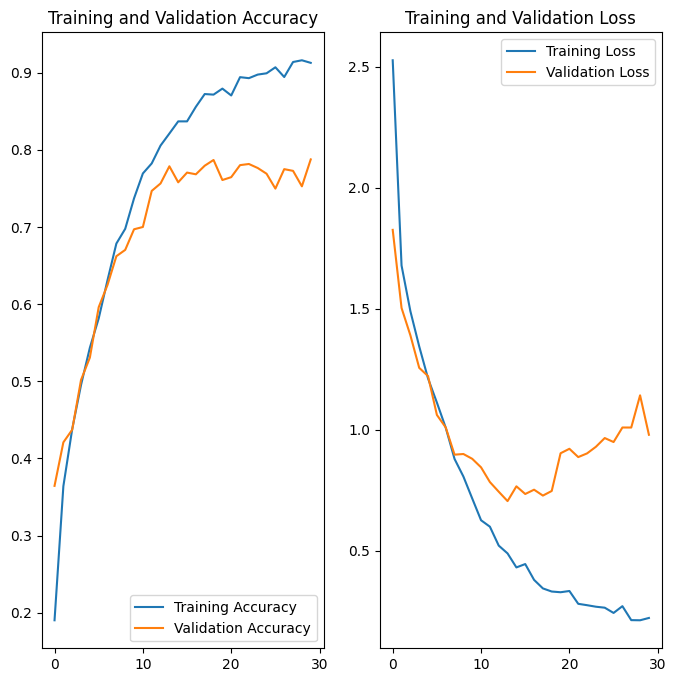

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations <a name='no11.5' />

-  The training accuracy seems to be nearly **~90%**.
-  The validation accuracy is nearly **~80%**.
-  Though the model accuracy has improved, the **class rebalance** has helped **treat the overfitting to some extent**.
-  Much better models could be built or tried out using **more epochs and more layers**.